In [145]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [146]:
# read the data
df = pd.read_csv('data.csv')

In [147]:
# check the data
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
790,62,F,ASY,138,294,1,Normal,106,N,1.9,Flat,1
114,49,F,NAP,130,207,0,ST,135,N,0.0,Up,0
451,64,M,ASY,144,0,0,ST,122,Y,1.0,Flat,1
491,75,M,ASY,170,203,1,ST,108,N,0.0,Flat,1


## Attribute Information:

1. **Age:** age of the patient `years` 
<br>
2. **Sex:** sex of the patient 
          * M: Male
          * F: Female 
3. **ChestPainType:** chest pain type 
          * TA: Typical Angina 
          * ATA: Atypical Angina 
          * NAP: Non-Anginal Pain 
          * ASY: Asymptomatic 
<br>
4. **RestingBP:** resting blood pressure `mm Hg` 
<br>
5. **Cholesterol:** serum cholesterol `mm/dl` 
<br>
6. **FastingBS:** fasting blood sugar 
    > $if FastingBS > 120 mg/dl, 0: otherwise $
<br>
7. **RestingECG:** resting electrocardiogram result
          *Normal: Normal 
          *ST: having ST-T wave abnormality
          *LVH: showing probable or definite leftventricular hypertrophy by Estes'criteria
<br>
8. **MaxHR:** maximum heart rate achieved `Numeric value between 60 and 202`
<br>
9. **ExerciseAngina:** exercise-induced angina
           *Y: Yes
           *N: No
<br>
10. **Oldpeak:** exercise relative to rest = ST `Numeric value measured in depression`
<br>
11. **ST_Slope:** the slope of the peak exercise ST segment 
           *Up: upsloping 
           *Flat: flat 
           *Down: downsloping
<br>
12. **HeartDisease:** output class  
           *1: heart disease
           *0: Normal


In [148]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [149]:
# checking the number of rows and columns
df.shape

(918, 12)

` using the info() method we can check the information about the data. It tell us the Null count and Dtype of the data`

In [150]:
# description of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


`Describe function works with numerical data in a different way then categorical data.`
<br>

`In numerical data it checks the mean,std,min,max values`

`We can see that the categorical columns like sex,chestPainType etc are ignored here`

In [151]:
# checking for missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [152]:
df.isnull().mean()

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

`Both the methods are useful to check for missing values`
<div class="alert alert-block alert-success">
<b>Checking for missing values:</b> 
    we can see that there is no missing value in the dataset
</div>




### Here we will distinguish the categorical and numerical values in the dataset

In [153]:
categoricalColumn = df.select_dtypes(object).columns
numericalColumn = df.select_dtypes(exclude=object).columns

In [154]:
# printing the categorical and numerical columns
print("Categorical Columns", categoricalColumn)
print("Numerical Columns", numericalColumn)

Categorical Columns Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
Numerical Columns Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


#### Checking for data imbalance in the target column

In [155]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

`The data are almost balanced`

<div class="alert alert-block alert-success">
<b>Exploratory data analysis:</b> 
    Now we will explore the dataset 
</div>

In [156]:
df[categoricalColumn].describe().T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


`Here describe function works slightly differently`
>We can see the unique value as how many unique values are there. Also which values comes maximum time as well as the number of the times that value appered in the dataset

In [157]:
df[categoricalColumn].Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

>**We will plot the graph for differnt columns**

In [158]:
# bar chart of sex column
px.bar(df['Sex'].value_counts(),height=400,width=400,title='Number of males and females ')

In [159]:
# pie chart of sex column along with percentage
px.pie(df,names='Sex',height=400,width=600, labels = {'M':'Male','F':'Female'},title='Count of Gender')

In [160]:
# average of people with heart disease based on their gender
df.pivot_table('HeartDisease',index='Sex')*100

,HeartDisease
Sex,
F,25.906736
M,63.172414


>We can see that most of the males in our dataset have heart disease

### Now we will cut the age column in 5 different column to check which range of age has maximum heart disease

In [161]:
age_range = pd.cut(df['Age'], 5)

In [162]:
# checking which age group has highest number of heart disease
df.groupby(age_range)['HeartDisease'].mean()*100 #we are checking mean value here

Age
(27.951, 37.8]    26.530612
(37.8, 47.6]      37.894737
(47.6, 57.4]      53.581662
(57.4, 67.2]      71.739130
(67.2, 77.0]      70.370370
Name: HeartDisease, dtype: float64

In [163]:
df.groupby(age_range)['HeartDisease'].sum() #here we are adding the values

Age
(27.951, 37.8]     13
(37.8, 47.6]       72
(47.6, 57.4]      187
(57.4, 67.2]      198
(67.2, 77.0]       38
Name: HeartDisease, dtype: int64

<div class="alert alert-block alert-warning">
<b>Observation:</b>We can see that [57-67] age group has the highest number of heart disease
</div>

In [164]:
np.round(df.pivot_table('HeartDisease',index='Sex',columns=age_range)*100,2)

Age,"(27.951, 37.8]","(37.8, 47.6]","(47.6, 57.4]","(57.4, 67.2]","(67.2, 77.0]"
Sex,,,,,
F,7.69,13.95,22.08,48.08,12.50
M,33.33,44.90,62.50,77.23,80.43


<div class="alert alert-block alert-info">
    <b>Observation:</b> As seen from the above table we can conclude that <b>Females</b> from [57-67] years has high average of Heart Disease while <b>Males</b> from [47+] years mostly have Heart Disease
</div>

In [165]:
# we will now analyse the ChestPainType column
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

`We can see that ASY types chest pain are maximum in our dataset`
<br>
>Now we will check how many people have heart disease who have chest pain

In [166]:
df.groupby('ChestPainType')['HeartDisease'].sum()

ChestPainType
ASY    392
ATA     24
NAP     72
TA      20
Name: HeartDisease, dtype: int64

In [167]:
df.groupby('ChestPainType')['HeartDisease'].mean()*100 #we are finding the mean value here

ChestPainType
ASY    79.032258
ATA    13.872832
NAP    35.467980
TA     43.478261
Name: HeartDisease, dtype: float64

`[392] person have heart disease who have ASY type of ChestPain`

In [168]:
# plotting it in a bar graph for better understanding
px.bar(df.groupby('ChestPainType')['HeartDisease'].sum(),height=400,width=700)

<div class="alert alert-block alert-success">
<b>Observation:</b> People with ASY ChestPainType are more likely to have Heart Disease
   
</div>

>Let's check and see if this holds true based on individual sex

In [169]:
df.pivot_table('HeartDisease',index='Sex',columns='ChestPainType',aggfunc='sum')

ChestPainType,ASY,ATA,NAP,TA
Sex,,,,
F,39,4,6,1
M,353,20,66,19


In [170]:
(df.pivot_table('HeartDisease',index='Sex',columns='ChestPainType',aggfunc='mean')*100).round(2)

ChestPainType,ASY,ATA,NAP,TA
Sex,,,,
F,55.71,6.67,11.32,10.00
M,82.86,17.70,44.00,52.78


<AxesSubplot:xlabel='Sex'>

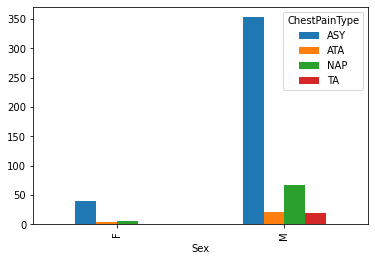

In [171]:
# plotting it into graph
df.pivot_table('HeartDisease',index='Sex',columns='ChestPainType',aggfunc='sum').plot(kind='bar')

<div class="alert alert-block alert-success">
<b>Intresting:</b> No matter what the Gender is, people with ASY ChestPainType are nore likely to have Heart Disease
</div>

In [172]:
# we will analyse the RestingECG column
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

`As we can see normal RestingECG are more in our dataset`
>Let's check it with heart disease, how many people who have heart disease comes under normal or LVH or ST

In [173]:
df.groupby('RestingECG')['HeartDisease'].mean()*100

RestingECG
LVH       56.382979
Normal    51.630435
ST        65.730337
Name: HeartDisease, dtype: float64

In [174]:
# plotting the graph
px.bar(df.groupby('RestingECG')['HeartDisease'].mean()*100,height=400,width=600)

`The RestingECG seems balance for both LVH and Normal except for ST which has about 65% individuals having heart disease`

In [175]:
df.groupby('RestingECG')['HeartDisease'].sum() #which one to keep?

RestingECG
LVH       106
Normal    285
ST        117
Name: HeartDisease, dtype: int64

In [176]:
px.bar(df.groupby('RestingECG')['HeartDisease'].sum()*100,height=400,width=600)

>Checking for individual sex

In [177]:
df.pivot_table('HeartDisease',index='Sex',columns='RestingECG',aggfunc='sum')

RestingECG,LVH,Normal,ST
Sex,,,
F,14,29,7
M,92,256,110


<AxesSubplot:xlabel='Sex'>

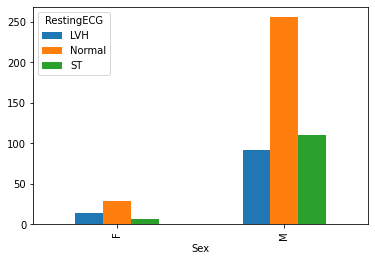

In [178]:
# plotting it into bar chart
(df.pivot_table('HeartDisease',index='Sex',columns='RestingECG',aggfunc='sum')).plot(kind='bar')

In [179]:
(df.pivot_table('HeartDisease',index='Sex',columns='RestingECG',aggfunc='mean')*100).round(2)

RestingECG,LVH,Normal,ST
Sex,,,
F,29.79,24.58,25.00
M,65.25,58.99,73.33


<AxesSubplot:xlabel='Sex'>

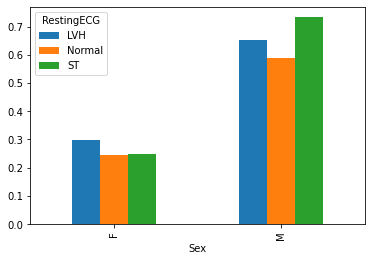

In [180]:
# plotting
(df.pivot_table('HeartDisease',index='Sex',columns='RestingECG',aggfunc='mean')).plot(kind='bar')

In [181]:
# now we analyze the exerciseAngina column
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [182]:
(df.groupby('ExerciseAngina')['HeartDisease'].mean()*100).round(2)

ExerciseAngina
N    35.10
Y    85.18
Name: HeartDisease, dtype: float64

` Around 85% people weith ExerciseAngina have heart disease`

In [183]:
# based on sex
(df.pivot_table('HeartDisease', index='Sex', columns='ExerciseAngina')*100).round(2)

ExerciseAngina,N,Y
Sex,,
F,15.33,62.79
M,42.57,88.11


In [184]:
df.groupby('ExerciseAngina')['HeartDisease'].sum()

ExerciseAngina
N    192
Y    316
Name: HeartDisease, dtype: int64

In [185]:
df.pivot_table('HeartDisease', index='Sex', columns='ExerciseAngina',aggfunc='sum')

ExerciseAngina,N,Y
Sex,,
F,23,27
M,169,289


In [186]:
(df.groupby('ST_Slope')['HeartDisease'].mean() * 100).round(2)

ST_Slope
Down    77.78
Flat    82.83
Up      19.75
Name: HeartDisease, dtype: float64

`People with Up ST_Slope have lower rate of heart disease than others`

In [187]:
df.groupby('ST_Slope')['HeartDisease'].sum() 

ST_Slope
Down     49
Flat    381
Up       78
Name: HeartDisease, dtype: int64

### kun2 lom (ask sir)

# Numerical Columns

In [188]:
numericalColumn

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [189]:
df[numericalColumn].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [190]:
px.scatter(df, x='MaxHR',y='Age',color='HeartDisease',title='Effect of Heart Rate and Age on Diseases')

>People with higher age group and low Heart rate are more prone to HeartDisease

In [191]:
px.scatter(df,x='Age',y='Cholesterol',color='HeartDisease')

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

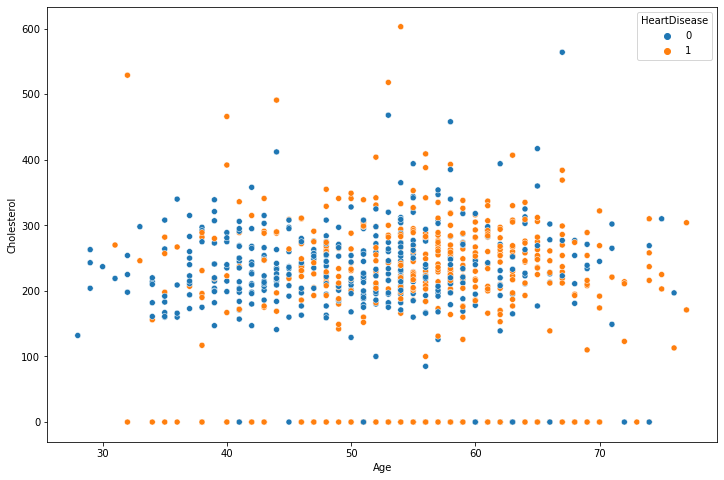

In [192]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Age',y='Cholesterol',hue='HeartDisease')

`We can see that there are many 0 values in cholesterol, We have to fix that`

<AxesSubplot:>

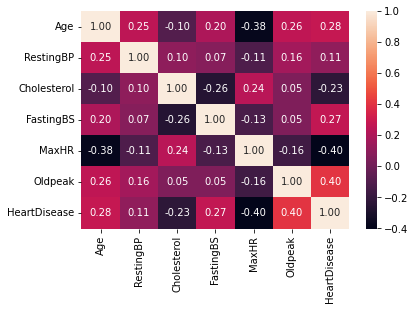

In [193]:
sns.heatmap(df[numericalColumn].corr(),annot=True,fmt='.2f')

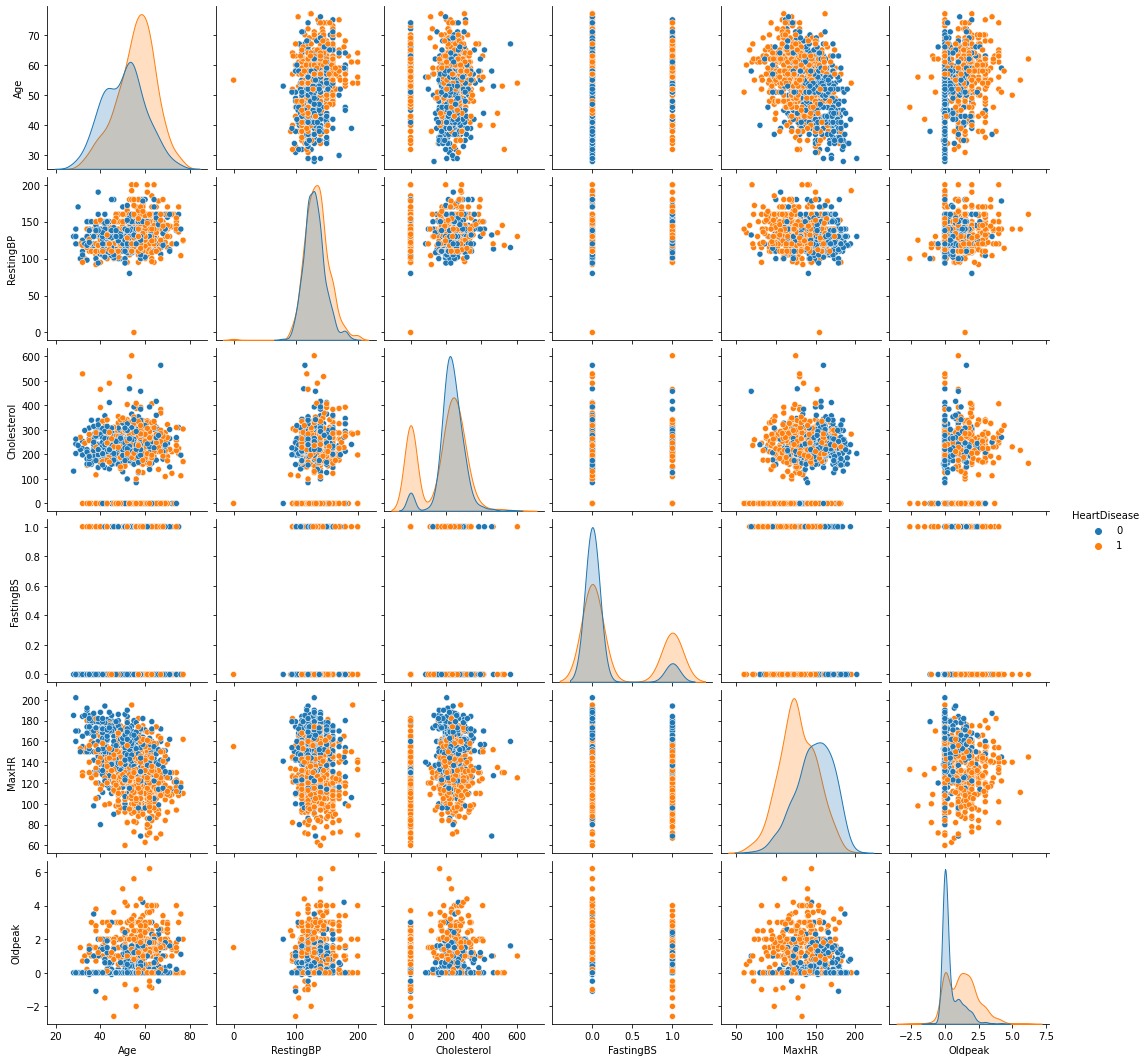

In [194]:
sns.pairplot(df,hue='HeartDisease')

`Conclusion`
>From the above analysis we can see that most of our categorical features has some relationship with our Target Variable. While the numerical features are less more important but nevertheless we are going to include both to our model. and also most of the males in our Dataset have Heart Disease.

# Outliers
`Using boxplots it's easy and fast to see the outliers as it represents those points clearly on the plot`

In [195]:
px.box(data_frame=df[numericalColumn])

`We can see that some values of ResingBP are near zero and also there are some values of cholesterol which is near zero, which is not possible`
`lets analyse how many are there and impute them ` 

>Let's find the outliers in RestingBP first

In [196]:
px.box(data_frame=df[numericalColumn],y='RestingBP')

In [197]:
#Let's search the outlier
df[df['RestingBP'] <50]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


`Here we see that the entry does not have RestingBP,Cholesterol and FastingBS. I will drop this entry as it is one entry in one thousand`

In [198]:
# dropping the index 449
df.drop(df.index[449],inplace=True)

In [199]:
df[df['RestingBP'] <50]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


`We can see that the row is removed`
>Let's find the ourliers in Cholesterol

In [200]:
px.box(data_frame=df[numericalColumn],y='Cholesterol')

In [201]:
df.corr()['Cholesterol']['HeartDisease']

-0.23147856637665595

`Cholesterol is giving negation correlation with heart disease`

In [202]:
#Let's find the outliers
df[df['Cholesterol'] ==0 ]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


`Almost 10% of our dataset has the values as 0 Before making assumptions I will see what is the distribution of heart disease within these points.`

In [203]:
df[df['Cholesterol'] ==0]['HeartDisease'].value_counts()

1    151
0     20
Name: HeartDisease, dtype: int64

In [204]:
df[df["Cholesterol"] ==0]['HeartDisease'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1    88.3%
0    11.7%
Name: HeartDisease, dtype: object

`We can see that amlost 88% of the entries here has heart disease so this is highly skewed. In order to impute skewed data i'll use median of the values of cholesterol with heart disease`
`I'll do this because median of the values is resistant to outliers`

In [205]:
#This line of code gives me the non zero values of cholesterol with heart disease.
mask = (df['Cholesterol'] !=0) & (df['HeartDisease'] ==1)
df.loc[mask]['Cholesterol'].median()

246.0

>Let's impute it

In [206]:
df.loc[df['Cholesterol'] ==0,"Cholesterol"] = df.loc[mask]['Cholesterol'].median()

`Let's check how the distribution is modified`

In [207]:
px.box(data_frame=df[numericalColumn],y='Cholesterol')

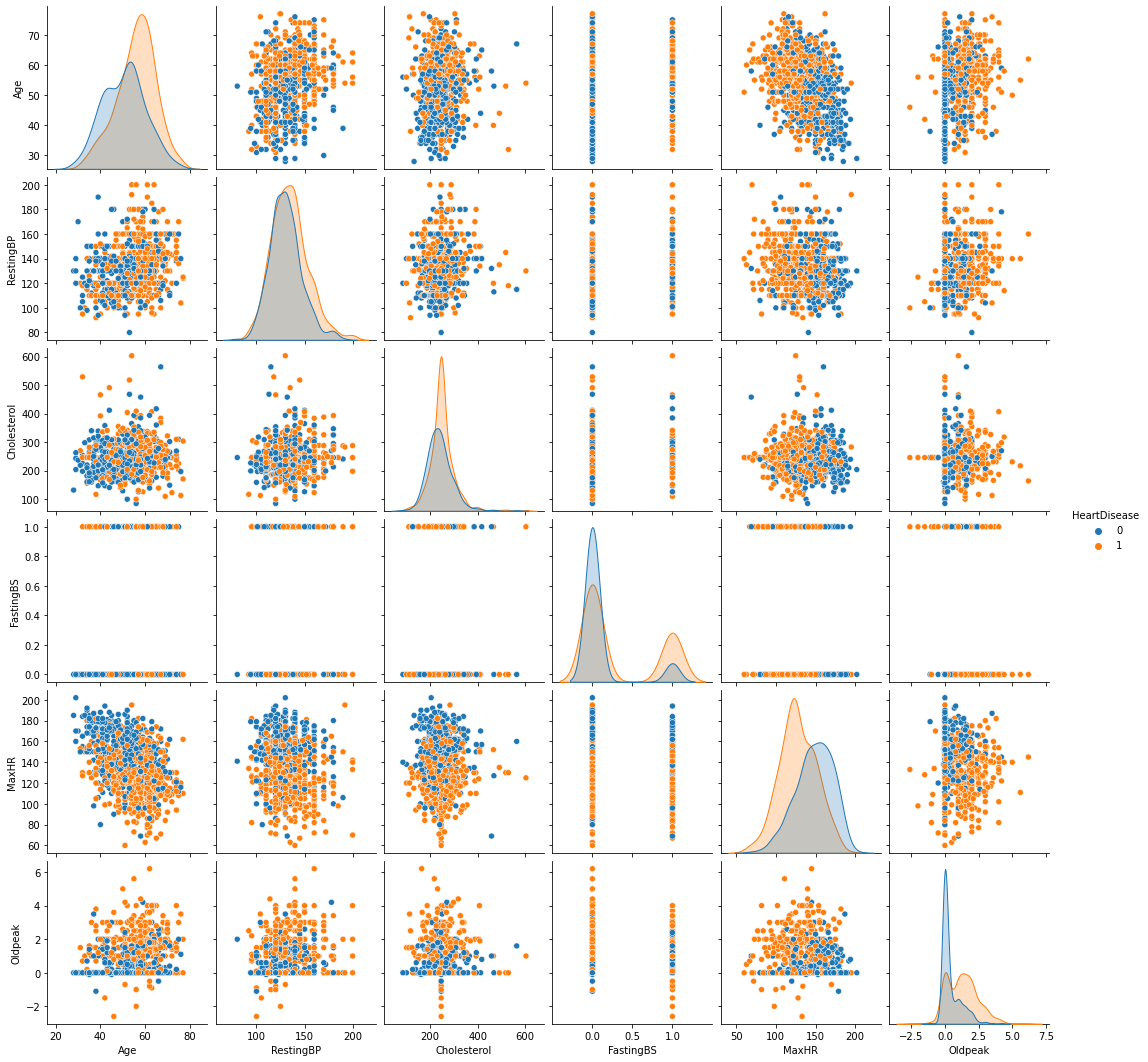

In [208]:
sns.pairplot(df,hue='HeartDisease')

In [209]:
df.corr()['Cholesterol']['HeartDisease']

0.09727708167111189

`Here we can see that the distribution of cholesterol has changed and also the correlation. From having a negative correlation with HeartDisease and now it is positive`

In [210]:
px.scatter(df,x='Age',y='Cholesterol',color='HeartDisease')

In [211]:
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
139,43,M,ASY,150,247,0,Normal,130,Y,2.0,Flat,1


`ML Algorithm does not give best result for categorical column`
>Converting the categorical column to numerical column

In [212]:
# converting and saving it into new data-frame
df_new = df.copy()

In [213]:
df_new[categoricalColumn] = df_new[categoricalColumn].astype('category')
df_new[categoricalColumn] = df_new[categoricalColumn].apply(lambda x:x.cat.codes)

In [214]:
print(np.unique(df_new.ChestPainType))

[0 1 2 3]


In [215]:
df_new.sample(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
543,70,1,0,170,192,0,2,129,1,3.0,0,1
761,52,1,0,112,230,0,1,160,0,0.0,2,1


# Splitting the dataset into Training set and Test set

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
# seperating the target column 
X = df_new.drop(columns=['HeartDisease'])
y = df_new['HeartDisease']

In [218]:
# splitting the data into training and test column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [219]:
X_train.shape,X_test.shape

((733, 11), (184, 11))

>Training the dataset without scaling the data

## Training with Random Forest Classifier

In [220]:
from sklearn.ensemble import RandomForestClassifier
model_randomForest = RandomForestClassifier()
model_randomForest.fit(X_train,y_train)

RandomForestClassifier()

## Training with Logistic Regression

In [221]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(max_iter=500)
model_logistic.fit(X_train,y_train)

LogisticRegression(max_iter=500)

## Training with KNN

In [222]:
from sklearn.neighbors import KNeighborsClassifier
model_kneighbours = KNeighborsClassifier()
model_kneighbours.fit(X_train,y_train)

KNeighborsClassifier()

## Training with XGBClassifier

In [223]:
!pip install xgboost

     |██▉                             | 15.5 MB 208 kB/s eta 0:12:39^C  |█                               | 5.3 MB 21 kB/s eta 2:09:15     |█▏                              | 6.5 MB 174 kB/s eta 0:15:57     |█▌                              | 7.9 MB 195 kB/s eta 0:14:06

ERROR: Operation cancelled by user


In [224]:

from xgboost import XGBClassifier
mode_xgb = XGBClassifier()
mode_xgb.fit(X_train,y_train)

ModuleNotFoundError: No module named 'xgboost'

## Training with SVC


In [225]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train,y_train)

SVC()

## Training with DecisionTreeClassifier

In [226]:
from sklearn.tree import DecisionTreeClassifier
model_decision = DecisionTreeClassifier()
model_decision.fit(X_train,y_train)

DecisionTreeClassifier()

# Making confusion Matrix

In [227]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [228]:
y_pred_random = model_randomForest.predict(X_test)
y_pred_logistic = model_logistic.predict(X_test)
y_pred_neighbours = model_kneighbours.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
y_pred_decision = model_decision.predict(X_test)

>Confusion Matrix

In [229]:
cm_random = confusion_matrix(y_test,y_pred_random)
print(cm_random)

[[73 19]
 [ 9 83]]


In [230]:
cm_logistic = confusion_matrix(y_test,y_pred_logistic)
print(cm_logistic)

[[71 21]
 [11 81]]


In [231]:
cm_neighbours = confusion_matrix(y_test,y_pred_neighbours)
print(cm_neighbours)

[[45 47]
 [16 76]]


In [232]:
cm_svm = confusion_matrix(y_test,y_pred_svm)
print(cm_svm)

[[48 44]
 [17 75]]


In [233]:
cm_decision = confusion_matrix(y_test,y_pred_decision)
print(cm_decision)

[[68 24]
 [15 77]]


>Accuracy Score

In [234]:
random_accuracy = accuracy_score(y_test,y_pred_random)
logistic_accuracy = accuracy_score(y_test,y_pred_logistic)
neighbour_accuracy = accuracy_score(y_test,y_pred_neighbours)
svm_accuracy = accuracy_score(y_test,y_pred_svm)
decision_accuracy = accuracy_score(y_test,y_pred_decision)

>Plotting the accuracy score

Text(0, 0.5, 'Accuracy')

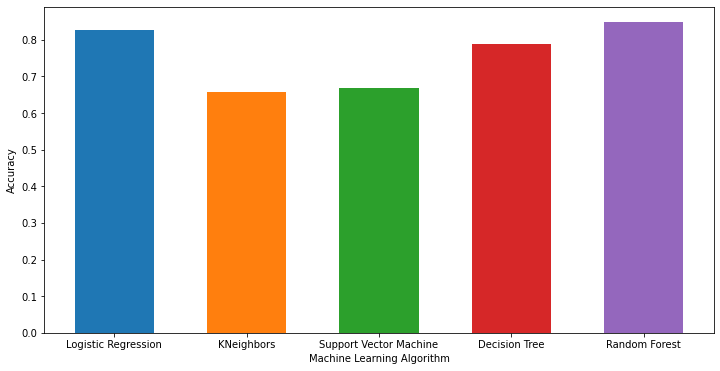

In [235]:
plt.figure(figsize=(12, 6))
plt.bar("Logistic Regression",logistic_accuracy,width=0.6)
plt.bar("KNeighbors",neighbour_accuracy,width=0.6)
plt.bar("Support Vector Machine",svm_accuracy,width=0.6)
plt.bar("Decision Tree",decision_accuracy,width=0.6)
plt.bar("Random Forest",random_accuracy,width=0.6)
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Accuracy")

In [236]:
print(random_accuracy,logistic_accuracy)

0.8478260869565217 0.8260869565217391


>Precision Score

In [237]:
random_precision = precision_score(y_test,y_pred_random)
logistic_precision = precision_score(y_test,y_pred_logistic)
neighbour_precision = precision_score(y_test,y_pred_neighbours)
svm_precision = precision_score(y_test,y_pred_svm)
decision_precision = precision_score(y_test,y_pred_decision)

Text(0, 0.5, 'Precision')

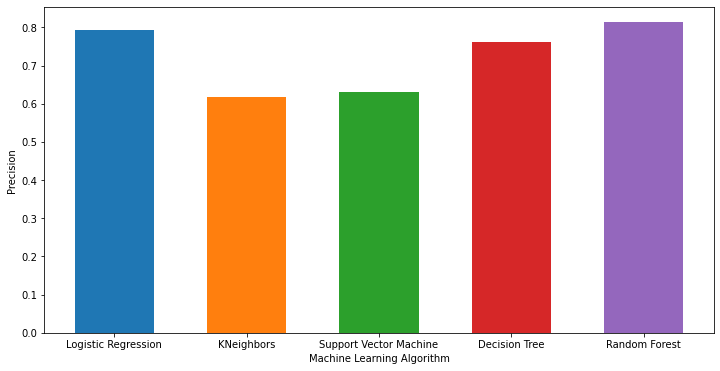

In [238]:
plt.figure(figsize=(12, 6))
plt.bar("Logistic Regression",logistic_precision,width=0.6)
plt.bar("KNeighbors",neighbour_precision,width=0.6)
plt.bar("Support Vector Machine",svm_precision,width=0.6)
plt.bar("Decision Tree",decision_precision,width=0.6)
plt.bar("Random Forest",random_precision,width=0.6)
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Precision")

>Recall Score

In [239]:
random_recall = recall_score(y_test,y_pred_random)
logistic_recall = recall_score(y_test,y_pred_logistic)
neighbour_recall = recall_score(y_test,y_pred_neighbours)
svm_recall = recall_score(y_test,y_pred_svm)
decision_recall = recall_score(y_test,y_pred_decision)

Text(0, 0.5, 'Recall')

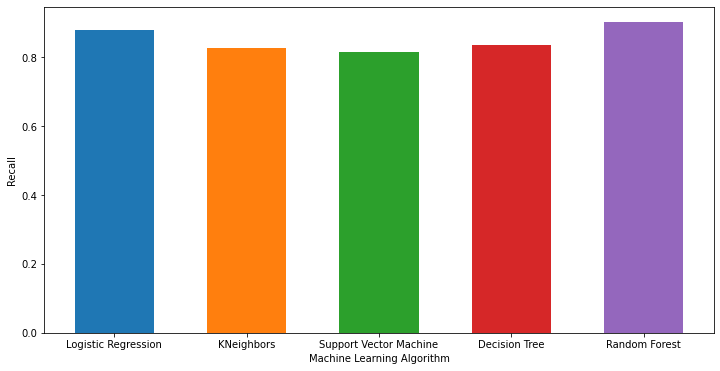

In [240]:
plt.figure(figsize=(12, 6))
plt.bar("Logistic Regression",logistic_recall,width=0.6)
plt.bar("KNeighbors",neighbour_recall,width=0.6)
plt.bar("Support Vector Machine",svm_recall,width=0.6)
plt.bar("Decision Tree",decision_recall,width=0.6)
plt.bar("Random Forest",random_recall,width=0.6)
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Recall")

>F1 Score

In [241]:
random_f1 = f1_score(y_test,y_pred_random)
logistic_f1 = f1_score(y_test,y_pred_logistic)
neighbour_f1 = f1_score(y_test,y_pred_neighbours)
svm_f1 = f1_score(y_test,y_pred_svm)
decision_f1 = f1_score(y_test,y_pred_decision)

Text(0, 0.5, 'F1 Score')

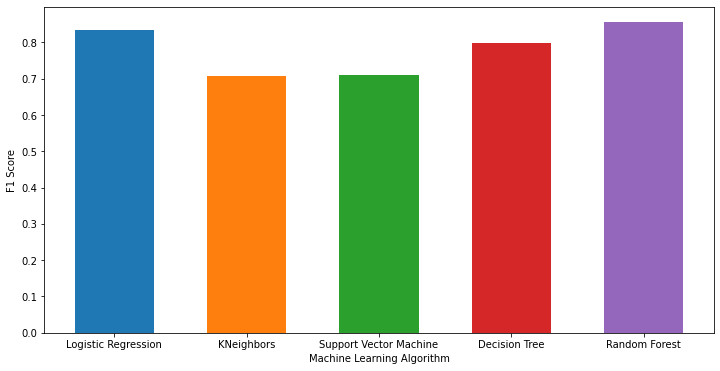

In [242]:
plt.figure(figsize=(12, 6))
plt.bar("Logistic Regression",logistic_f1,width=0.6)
plt.bar("KNeighbors",neighbour_f1,width=0.6)
plt.bar("Support Vector Machine",svm_f1,width=0.6)
plt.bar("Decision Tree",decision_f1,width=0.6)
plt.bar("Random Forest",random_f1,width=0.6)
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("F1 Score")

# Single prediction

In [249]:
result = model_randomForest.predict([[70,2,7,40,92,16,2,743,1,83,40]])

In [250]:
print(result)

[1]
